## PROBLEM STATEMENT

### We’re working on predicting diabetes risk using a univariate polynomial regression. We're looking at people's body mass index (BMI) to figure out if they might be at risk of diabetes.


### To make this happen, I'll be using a dataset called Scikit-Learn Diabetes. First, we're checking out the data focusing only on BMI and how it links to diabetes progression. Then, I'll using a polynomial regression model to make predictions. Lastly, I'll checking how good our predictions are using some metrics like R-squared, Mean Absolute Percentage Error, and Mean Squared Error.

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,  mean_squared_error, mean_absolute_percentage_error
import warnings

#### NOTEBOOK CONFIG

In [2]:
warnings.filterwarnings("ignore") ## Ignore package/modules warnings
pd.set_option('display.float_format', lambda x: '%.4f' % x) # Display values in dataframes as float upto 4 decimal points instead of exponents

## LOAD AND DESCRIBE THE DATA

In [3]:
data = load_diabetes()
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### Converting dataset to dataframe

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


#### Getting valuable insights

In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


#### Plotting differnt graphs to visualize our data

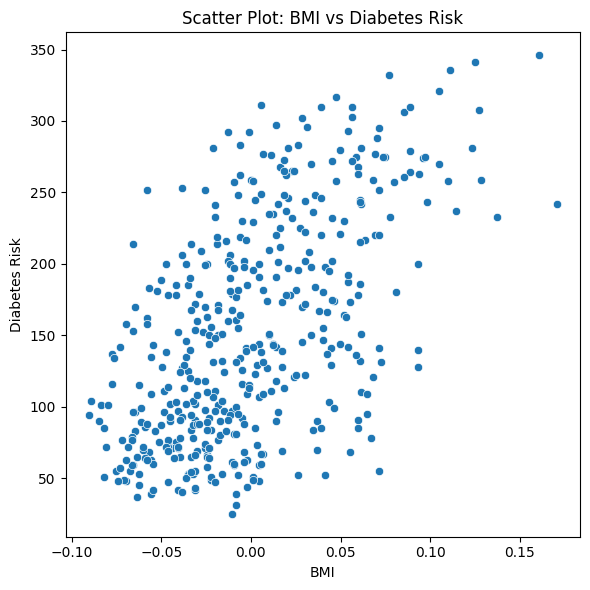

In [8]:
plt.figure(figsize=(6, 6))


sns.scatterplot(x='bmi', y=df['target'], data=df)
plt.title('Scatter Plot: BMI vs Diabetes Risk')
plt.xlabel('BMI')
plt.ylabel('Diabetes Risk')

plt.tight_layout()
plt.show()

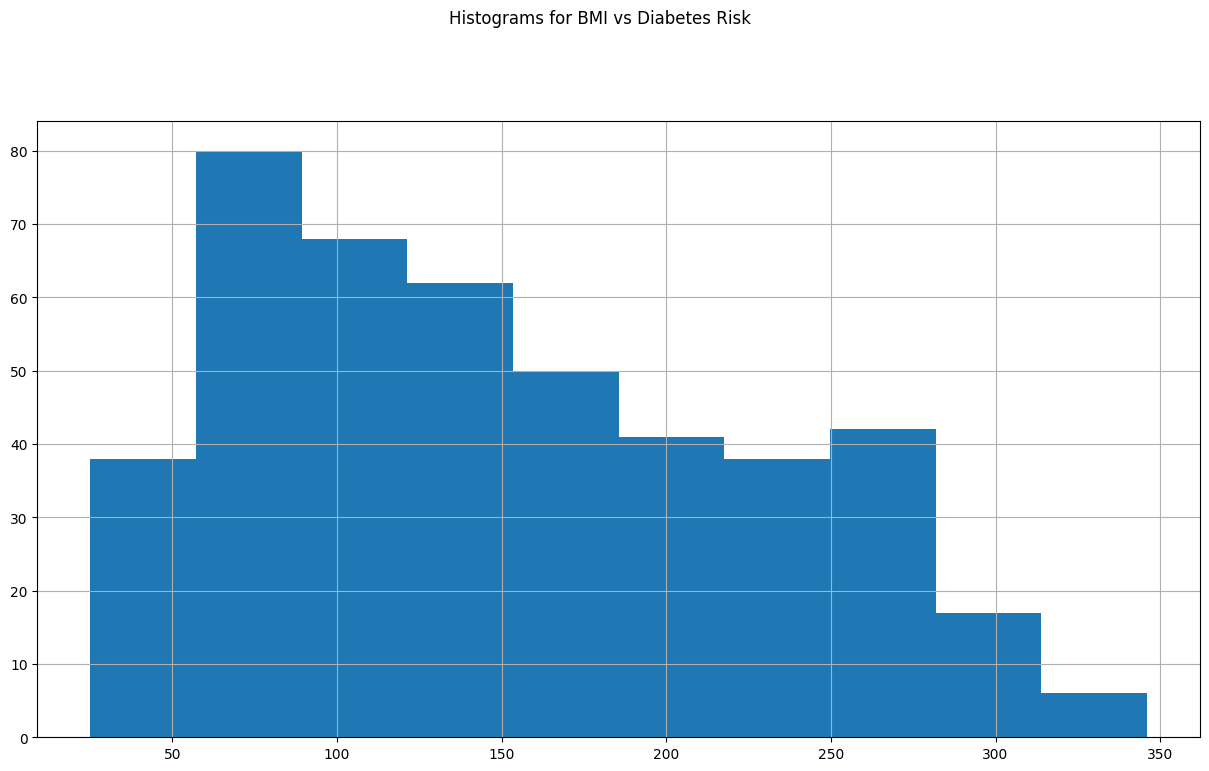

In [9]:
df['target'].hist(figsize=(15, 8))
plt.suptitle('Histograms for BMI vs Diabetes Risk', y=1.02)
plt.show()

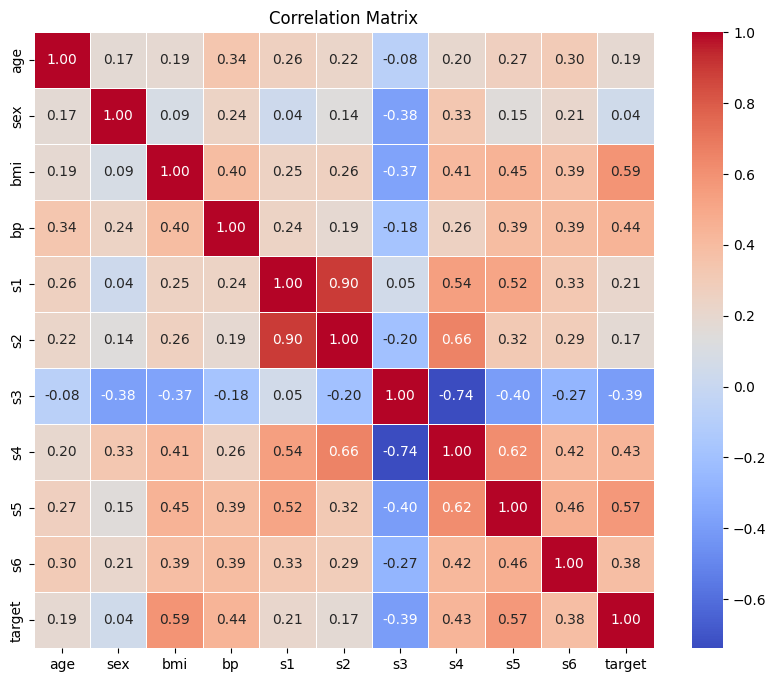

In [10]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## DATA CLEANING

#### Checking for null value

In [11]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

#### Checking for outliers

In [12]:
# Columns to check for outliers
columns_to_check = ['bmi', 'target']

# Calculate Q1, Q2 (median), Q3, and IQR for each column
Q1 = df[columns_to_check].quantile(0.25)
Q2 = df[columns_to_check].median()
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Count outliers for each column
outliers = ((df[columns_to_check] < (Q1 - 1.5 * IQR)) | (df[columns_to_check] > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()

# Create a summary table
outliers_table = pd.DataFrame({
    'Min': df[columns_to_check].min(),
    'Q1': Q1,
    'Median': Q2,
    'Q3': Q3,
    'Max': df[columns_to_check].max(),
    'IQR': IQR,
    'Outliers Count': outliers_count,
})

# Print the outliers table
outliers_table

,Min,Q1,Median,Q3,Max,IQR,Outliers Count
bmi,-0.0903,-0.0342,-0.0073,0.0312,0.1706,0.0655,3
target,25.0000,87.0000,140.5000,211.5000,346.0000,124.5000,0


#### We have total only 3/442 rows that contains outliers. Therefore we will drop those rows.

In [13]:
total_outliers_count = outliers.any(axis=1).sum()
total_outliers_count, df.shape

(3, (442, 11))

In [14]:
df = df[~outliers.any(axis=1)]
df.shape

(439, 11)

## SPLITTING DATA

#### We will be splitting data into train, test and validation with sizes 70%, 15% and 15% resp.

> NOTE: We can use a parameter as "random_state = n" to help up reproduce the same split of data each time we rerun entire code. WE will be ignoring this in favour of code that will not be effected by split of data.

In [15]:
X = df[['bmi']]
Y = df['target']

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3)
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=0.5)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape

((307, 1), (307,), (219, 1), (219,), (220, 1), (220,))

## MODEL

In [16]:
models = []
mse_train = []
r2_scores_train = []
mape_scores_train = []
mse_val = []
r2_scores_val = []
mape_scores_val = []

# Degrees from 0 to 5
for degree in range(6):
    
    # Transform the features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[['bmi']])
    X_val_poly = poly.transform(X_val[['bmi']])

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    # Predict on training and valation sets
    Y_train_pred = model.predict(X_train_poly)
    Y_val_pred = model.predict(X_val_poly)

    r2 = r2_score(Y_train, Y_train_pred)
    r2_scores_train.append(r2)
    r2 = r2_score(Y_val, Y_val_pred)
    r2_scores_val.append(r2)

    # Calculate Mean Squared Error for training and valation sets
    mse_train.append(mean_squared_error(Y_train, Y_train_pred))
    mse_val.append(mean_squared_error(Y_val, Y_val_pred))

    # Calculate MAPE for training and valation sets
    mape = np.mean(np.abs((Y_train - Y_train_pred) / Y_train)) * 100
    mape_scores_train.append(mape)
    mape = np.mean(np.abs((Y_val - Y_val_pred) / Y_val)) * 100
    mape_scores_val.append(mape)
    
    # Store the model
    models.append(model)

#### Creating a table that contains summary for performance of all 6 created models.

In [17]:
# Data preparation
summary = {
    'Degree': list(range(6)),
    'Model': models,
    'Train MSE': mse_train,
    'Validation MSE': mse_val,
    'Train R-squared': r2_scores_train,
    'Validation R-squared': r2_scores_val,
    'Train MAPE (%)': mape_scores_train,
    'Validation MAPE (%)': mape_scores_val
}

# Create a DataFrame
summary_table = pd.DataFrame(summary)

# Display the DataFrame
summary_table

,Degree,Model,Train MSE,Validation MSE,Train R-squared,Validation R-squared,Train MAPE (%),Validation MAPE (%)
0,0,LinearRegression(),5869.5649,5587.3487,0.0000,-0.0033,63.3841,55.9192
1,1,LinearRegression(),3962.9394,3628.9979,0.3248,0.3484,49.7002,44.1099
2,2,LinearRegression(),3961.9301,3619.2213,0.3250,0.3501,49.6462,44.0147
3,3,LinearRegression(),3961.9143,3618.5521,0.3250,0.3502,49.6582,44.0197
4,4,LinearRegression(),3874.7558,3652.2365,0.3399,0.3442,48.8588,44.4433
5,5,LinearRegression(),3874.0913,3655.9279,0.3400,0.3435,48.8412,44.3968


#### Finding the best model

> In this step, for simplicity, we will be considering a model that had best Validation Mean Absolute Percentage Error thereby, giving us best relative accuracy. In real world however, a combination of all 3 performance parameters [r2_score, mse, mape] si considered.

In [18]:
best_model_details = summary_table[summary_table['Validation MAPE (%)'] == summary_table['Validation MAPE (%)'].min()]
best_model = best_model_details['Model'].values[0]
best_degree = best_model_details['Degree'].values[0]

poly = PolynomialFeatures(degree=best_degree)

best_model, best_degree, poly

(LinearRegression(), 2, PolynomialFeatures())

#### Calculating performance on test dataset and plotting the graph

In [19]:
X_test_poly = poly.fit_transform(X_test[['bmi']])
Y_test_pred = best_model.predict(X_test_poly)

r2_test = r2_score(Y_test, Y_test_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
mape_test = np.mean(np.abs((Y_test - Y_test_pred) / Y_test)) * 100

print(f"Performance on Test Data:\nR2 Score: {r2_test}\nMean Squared Error: {mse_test}\nMean Absolute Percentage Error: {mape_test}")

Performance on Test Data:
R2 Score: 0.3195086026866212
Mean Squared Error: 4169.076310428515
Mean Absolute Percentage Error: 50.95015176964965


In [20]:
X_test.values.reshape(-1).shape, Y_test.shape, Y_test.shape

((219,), (219,), (219,))

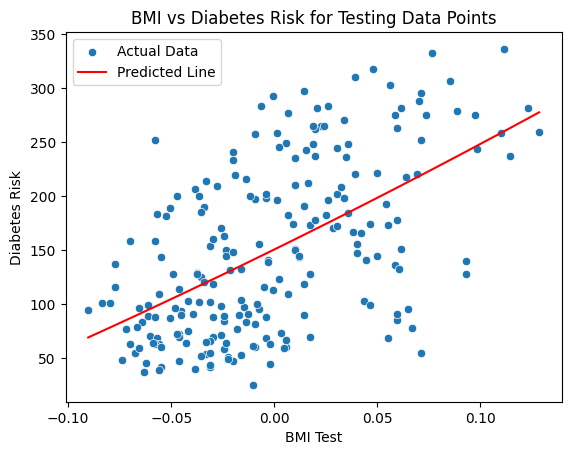

In [21]:
bmi_v_diabities_risk = pd.DataFrame({"BMI": X_test.values.reshape(-1), "Actual Diabetes Risk": Y_test, "Predicted Diabetes Risk": Y_test_pred})
sns.scatterplot(x='BMI', y='Actual Diabetes Risk', data=bmi_v_diabities_risk, label='Actual Data')
sns.lineplot(x='BMI', y='Predicted Diabetes Risk', data=bmi_v_diabities_risk, color='red', label='Predicted Line')

plt.xlabel('BMI Test')
plt.ylabel('Diabetes Risk')
plt.title('BMI vs Diabetes Risk for Testing Data Points')

plt.legend()
plt.show()

#### Calculating performance on test dataset and plotting the graphd


In [22]:
X_train_poly = poly.fit_transform(X_train[['bmi']])
Y_train_pred = best_model.predict(X_train_poly)

r2_train = r2_score(Y_train, Y_train_pred)
mse_train = mean_squared_error(Y_train, Y_train_pred)
mape_train = np.mean(np.abs((Y_train - Y_train_pred) / Y_train)) * 100

print(f"Performance on Train Data:\nR2 Score: {r2_train}\nMean Squared Error: {mse_train}\nMean Absolute Percentage Error: {mape_train}")

Performance on Train Data:
R2 Score: 0.32500447052913317
Mean Squared Error: 3961.9300655763222
Mean Absolute Percentage Error: 49.64622197505676


In [23]:
X_train.values.reshape(-1).shape, Y_train.shape, Y_train_pred.shape

((307,), (307,), (307,))

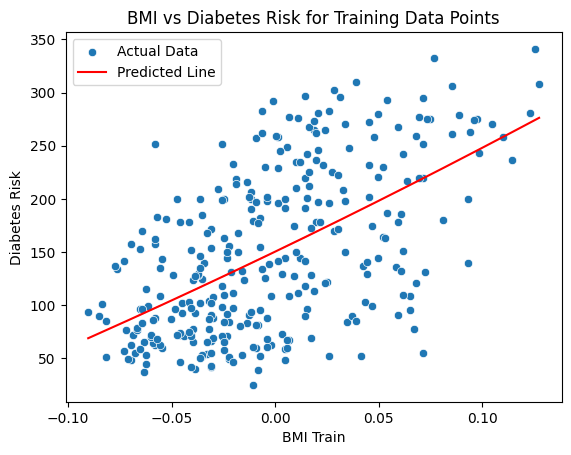

In [24]:
bmi_v_diabities_risk = pd.DataFrame({"BMI": X_train.values.reshape(-1), "Actual Diabetes Risk": Y_train, "Predicted Diabetes Risk": Y_train_pred})
sns.scatterplot(x='BMI', y='Actual Diabetes Risk', data=bmi_v_diabities_risk, label='Actual Data')
sns.lineplot(x='BMI', y='Predicted Diabetes Risk', data=bmi_v_diabities_risk, color='red', label='Predicted Line')

plt.xlabel('BMI Train')
plt.ylabel('Diabetes Risk')
plt.title('BMI vs Diabetes Risk for Training Data Points')

plt.legend()
plt.show()

In [25]:
X_val_poly = poly.fit_transform(X_val[['bmi']])
Y_val_pred = best_model.predict(X_val_poly)

r2_val = r2_score(Y_val, Y_val_pred)
mse_val = mean_squared_error(Y_val, Y_val_pred)
mape_val = np.mean(np.abs((Y_val - Y_val_pred) / Y_val)) * 100

print(f"Performance on Validation Data:\nR2 Score: {r2_val}\nMean Squared Error: {mse_val}\nMean Absolute Percentage Error: {mape_val}")

Performance on Validation Data:
R2 Score: 0.35012021322512943
Mean Squared Error: 3619.2212843086118
Mean Absolute Percentage Error: 44.014657574802904


In [26]:
X_val.values.reshape(-1).shape, Y_val.shape, Y_val_pred.shape

((220,), (220,), (220,))

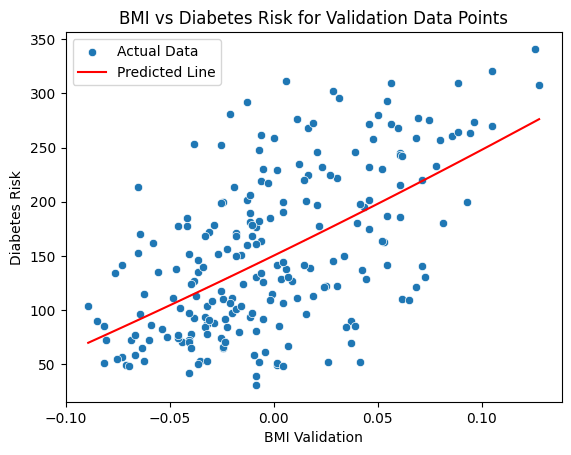

In [27]:
bmi_v_diabities_risk = pd.DataFrame({"BMI": X_val.values.reshape(-1), "Actual Diabetes Risk": Y_val, "Predicted Diabetes Risk": Y_val_pred})
sns.scatterplot(x='BMI', y='Actual Diabetes Risk', data=bmi_v_diabities_risk, label='Actual Data')
sns.lineplot(x='BMI', y='Predicted Diabetes Risk', data=bmi_v_diabities_risk, color='red', label='Predicted Line')

plt.xlabel('BMI Validation')
plt.ylabel('Diabetes Risk')
plt.title('BMI vs Diabetes Risk for Validation Data Points')

plt.legend()
plt.show()

#### Manually calcualting predicted value for a random bmi value and comparing with the one predicted by our best model and actual value

In [28]:
coef = np.round(np.array(best_model.coef_), 4)
intercept = np.round(best_model.intercept_, 4)

sample = df.sample()
bmi = poly.fit_transform(sample[['bmi']])
bmi = np.round(np.array(bmi), 4)

coef, intercept, bmi

(array([  0.    , 937.3676, 393.1207]),
 150.3457,
 array([[ 1.    , -0.0504,  0.0025]]))

In [29]:
np.round(np.dot(coef, bmi.T) + intercept, 4)[0]

104.0852

In [30]:
np.round(best_model.predict(bmi), 4)[0]

104.0852

In [31]:
sample['target'].values[0]

189.0

In above methods it can be seen that the model and our manual calculations presents same value or too close to be considered within margin of error. But when comared with actual value we can see there is still a lot of improvements that can be done to our model.

#### Finding numenbr of trainable parameters for each degree.

In [32]:
for i in range(0, 6):
    poly = PolynomialFeatures(degree = i).fit(X)
    print(f"Number of Trainable parameters for a polynomial with degree {i} is: {len(poly.get_feature_names_out())} i.e. {poly.get_feature_names_out()}")

Number of Trainable parameters for a polynomial with degree 0 is: 1 i.e. ['1']
Number of Trainable parameters for a polynomial with degree 1 is: 2 i.e. ['1' 'bmi']
Number of Trainable parameters for a polynomial with degree 2 is: 3 i.e. ['1' 'bmi' 'bmi^2']
Number of Trainable parameters for a polynomial with degree 3 is: 4 i.e. ['1' 'bmi' 'bmi^2' 'bmi^3']
Number of Trainable parameters for a polynomial with degree 4 is: 5 i.e. ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4']
Number of Trainable parameters for a polynomial with degree 5 is: 6 i.e. ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']
